In [1]:
import xfreq_analysis
import h5py, os
from importlib import reload
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from ecog.utils import bands

In [2]:
subjects = ['ec2', 'gp33']
files = ['EC2_blocks_1_8_9_15_76_89_105_CV_AA_ff_align_window_-0.5_to_0.79_file.h5',
         'GP33_blocks_1_5_30_CV_AA_ff_align_window_-0.5_to_0.79_file.h5']

# Create data

In [5]:
reload(xfreq_analysis)
for subject, f_name in zip(subjects, files):
    with h5py.File(os.path.join(folder, f_name)) as f:
        for sec in spect_ecog_channels:
            xfreq_analysis.save_power(f, sec, spect_cv, subject)

In [6]:
reload(xfreq_analysis)
for subject, f_name in zip(subjects, files):
    with h5py.File(os.path.join(folder, f_name)) as f:
        xfreq_analysis.save_correlations(f, subject)

loaded hg
freq
time
loaded hg
freq
time


In [7]:
reload(xfreq_analysis)
for subject, f_name in zip(subjects, files):
    with h5py.File(os.path.join(folder, f_name)) as f:
        xfreq_analysis.save_hg_power(f, subject)

(7, 57, 85, 258)
0 30
1 31
2 32
3 33
4 34
5 35
6 36
(7, 57, 96, 258)
0 30
1 31
2 32
3 33
4 34
5 35
6 36


# Plot data

In [78]:
plt.close()
f = plt.figure(figsize=(6, 10))

l_edge = .05
t_edge = .05
r_edge = .05
b_edge = .05

v_gap = .15

h1_gap = .025
h2_gap = .05
h3_gap = .05

r1_height = .25
r2_height = .15
r3_height = .2
r4_height = 1. - t_edge - r1_height - h1_gap - r2_height - h2_gap - r3_height - h3_gap - b_edge

width = (1. - l_edge - r_edge - v_gap) / 2.

c1_x = l_edge + width + v_gap

r1_y = h1_gap + r2_height + h2_gap + r3_height + h3_gap + r4_height + b_edge
ax0 = f.add_axes([l_edge, r1_y, width, r1_height])
ax1 = f.add_axes([c1_x, r1_y, width, r1_height])

r2_y = h2_gap + r3_height + h3_gap + r4_height + b_edge
ax2 = f.add_axes([l_edge, r2_y, width, r2_height])
ax3 = f.add_axes([c1_x, r2_y, width, r2_height])

r3_y = h3_gap + r4_height + b_edge
ax4 = f.add_axes([l_edge, r3_y, width, r3_height])
ax5 = f.add_axes([c1_x, r3_y, width, r3_height])

r4_y = b_edge
ax6 = f.add_axes([l_edge, r4_y, width, r4_height])
ax7 = f.add_axes([c1_x, r4_y, width, r4_height])

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False False False False False False False False False False False False
 False False False False]


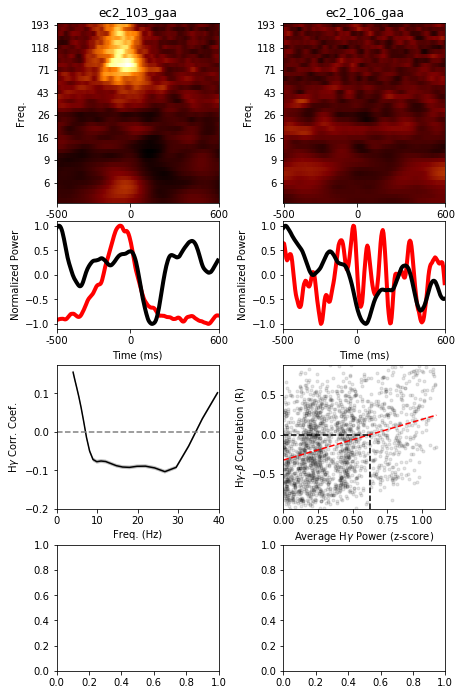

In [79]:
reload(xfreq_analysis)
subject = 'ec2'
cv = 'gaa'
ch = 103
xfreq_analysis.plot_power(subject, ch, cv, [ax0, ax2], vmin=-0.725590412048, vmax=2.90856576009)

ch = 106
xfreq_analysis.plot_power(subject, ch, cv, [ax1, ax3], vmin=-0.725590412048, vmax=2.90856576009)

xfreq_analysis.plot_correlations(subject, ax4, kind='freq')

xfreq_analysis.plot_power_correlations(subject, ax5, num=2)

plt.show()

positive: slope 0.5140412997423818, intercept -0.3228450319837589, R, 0.32426979907284764, p 5.77408654432186e-51, std_err 0.033282687997041864
negative: slope -0.6554175557056303, intercept -0.24058564261033427, R, -0.15645907825657454, p 7.06183891449259e-17, std_err 0.07803781349945295
positive: slope 0.4626465589195801, intercept -0.09203090988594637, R, 0.19494769980390803, p 1.511553892009385e-20, std_err 0.04930178951069164
negative: slope -0.17306254975130816, intercept -0.029395657595825204, R, -0.04270757120448592, p 0.015036276311800212, std_err 0.07113712772130204


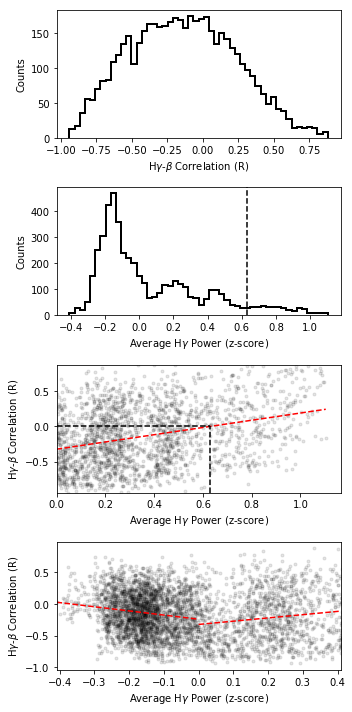

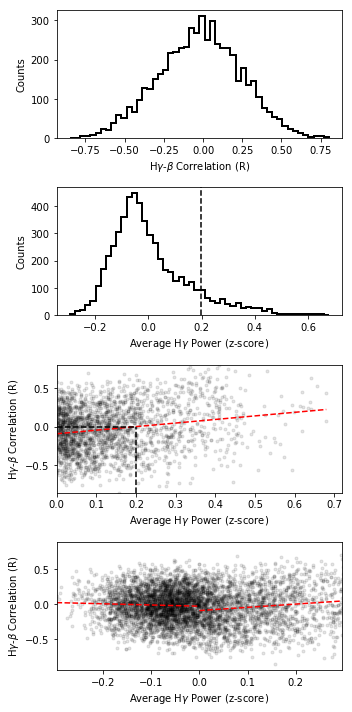

In [577]:
plt.close()
for subject in subjects:
    plot_power_correlations(subject)
plt.show()

(40, 57, 85)
(40, 365)
365
(40, 57, 96)
(40, 577)
577


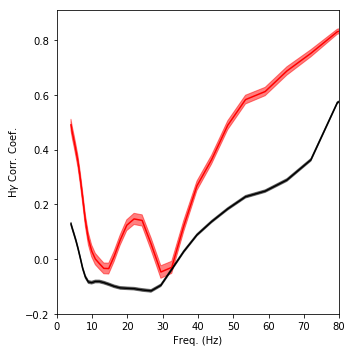

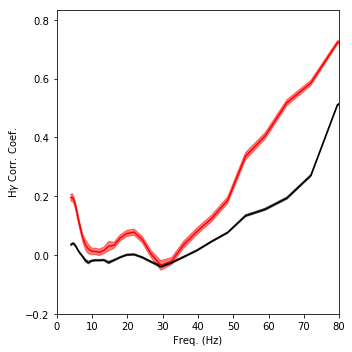

In [567]:
plt.close()
for subject in subjects:
    plot_resolved_power_correlations(subject)
plt.show()